In [1]:
# Import Dependents
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data CSV 
df_og = pd.read_csv("../resources/winequality-red.csv")
df_og.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Defining X and Y axis for machine learning
X = df_og[[
    "fixed acidity", 
    "volatile acidity", 
    "citric acid", 
    "residual sugar", 
    "chlorides", 
    "free sulfur dioxide", 
    "total sulfur dioxide", 
    "density", 
    "pH", 
    "sulphates",
    "alcohol"
]]

y = df_og["quality"].values.reshape(-1,1)

In [4]:
# Splitting Data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
# Scaling data to improve machine learning accuracy
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [6]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [7]:
# Train the linearmodel 
from sklearn.linear_model import LinearRegression
linearmodel = LinearRegression()
linearmodel.fit(X_train_scaled, y_train_scaled)
linearmodel.score(X_test_scaled, y_test_scaled)

0.3348456451292864

In [8]:
# Train the RandomForestClassifiermodel 
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifiermodel = RandomForestClassifier(n_estimators=200)
RandomForestClassifiermodel.fit(X_train_scaled, y_train)
RandomForestClassifiermodel.score(X_test_scaled, y_test)

0.7125

In [9]:
# Display which category is more important
importances = RandomForestClassifiermodel.feature_importances_
importances

array([0.0760214 , 0.10135945, 0.07531274, 0.07603893, 0.08249003,
       0.06830351, 0.10251071, 0.09086525, 0.07494532, 0.10993799,
       0.14221466])

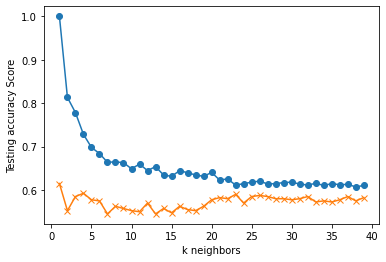

In [10]:
# Plotting train and test accuracy for KNN model to determine number of neighbours to use
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
train_scores = []
test_scores = []
for k in range(1, 40, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.plot(range(1, 40, 1), train_scores, marker='o')
plt.plot(range(1, 40, 1), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
# Training the KNN model base on the optimised number of neighbour
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_scaled, y_train)
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)
test_score

0.585

In [79]:
# Creating encoder for neural network model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# One-hot encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [84]:
y_train_categorical[0]

array([0., 0., 1., 0., 0., 0.], dtype=float32)

In [99]:
# Defining layers in the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=11))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

In [100]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_34 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_35 (Dense)             (None, 6)                 606       
Total params: 11,906
Trainable params: 11,906
Non-trainable params: 0
_________________________________________________________________


In [102]:
# Compile the neural network model
model.compile(optimizer='adam', loss="categorical_crossentropy",
              metrics=['accuracy'])

In [103]:
# Fit the neural network model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=500,
    shuffle=True,
    verbose=2
)

Epoch 1/500
38/38 - 0s - loss: 1.2847 - accuracy: 0.5029
Epoch 2/500
38/38 - 0s - loss: 1.0094 - accuracy: 0.6063
Epoch 3/500
38/38 - 0s - loss: 0.9598 - accuracy: 0.6155
Epoch 4/500
38/38 - 0s - loss: 0.9367 - accuracy: 0.6247
Epoch 5/500
38/38 - 0s - loss: 0.9114 - accuracy: 0.6339
Epoch 6/500
38/38 - 0s - loss: 0.8944 - accuracy: 0.6380
Epoch 7/500
38/38 - 0s - loss: 0.8807 - accuracy: 0.6414
Epoch 8/500
38/38 - 0s - loss: 0.8663 - accuracy: 0.6489
Epoch 9/500
38/38 - 0s - loss: 0.8568 - accuracy: 0.6580
Epoch 10/500
38/38 - 0s - loss: 0.8553 - accuracy: 0.6522
Epoch 11/500
38/38 - 0s - loss: 0.8347 - accuracy: 0.6539
Epoch 12/500
38/38 - 0s - loss: 0.8171 - accuracy: 0.6672
Epoch 13/500
38/38 - 0s - loss: 0.8126 - accuracy: 0.6631
Epoch 14/500
38/38 - 0s - loss: 0.7988 - accuracy: 0.6781
Epoch 15/500
38/38 - 0s - loss: 0.7929 - accuracy: 0.6672
Epoch 16/500
38/38 - 0s - loss: 0.7891 - accuracy: 0.6664
Epoch 17/500
38/38 - 0s - loss: 0.7727 - accuracy: 0.6806
Epoch 18/500
38/38 - 0s

In [36]:
# Create a prediction function 
def predict(model, X_scaler, y_scaler, user_inputs):
    # get the user input data 
    fixed_acidity = user_inputs["fixed acidity"]
    volatile_acidity = user_inputs["volatile acidity"]
    citric_acid = user_inputs["citric acid"]
    residual_sugar = user_inputs["residual sugar"]
    chlorides = user_inputs["chlorides"]
    free_sulfur_dioxide = user_inputs["free sulfur dioxide"]
    total_sulfur_dioxide = user_inputs["total sulfur dioxide"]
    density = user_inputs["density"]
    pH = user_inputs["pH"]
    sulphates = user_inputs["sulphates"]
    alcohol = user_inputs["alcohol"]

    # store input data into df 
    input_df = pd.DataFrame({
        "fixed_acidity": [fixed_acidity],
        "volatile_acidity": [volatile_acidity],
        "citric_acid": [citric_acid],
        "residual_sugar": [residual_sugar],
        "chlorides": [chlorides],
        "free_sulfur_dioxide": [free_sulfur_dioxide],
        "total_sulfur_dioxide": [total_sulfur_dioxide],
        "density": [density],
        "pH": [pH],
        "sulphates": [sulphates],
        "alcohol": [alcohol]
    })

    # scale the X input df 
    X_scaled = X_scaler.transform(input_df)

    # obtain prediction (y) 
    prediction_scaled = model.predict(X_scaled)
    
    # scale prediction to human readable terms
    prediction = y_scaler.inverse_transform(prediction_scaled)

    return prediction 




In [37]:
# Prepare user_input to go into the predict function 
def scaledata(X_scaler, user_inputs):
    # get the user input data 
    fixed_acidity = user_inputs["fixed acidity"]
    volatile_acidity = user_inputs["volatile acidity"]
    citric_acid = user_inputs["citric acid"]
    residual_sugar = user_inputs["residual sugar"]
    chlorides = user_inputs["chlorides"]
    free_sulfur_dioxide = user_inputs["free sulfur dioxide"]
    total_sulfur_dioxide = user_inputs["total sulfur dioxide"]
    density = user_inputs["density"]
    pH = user_inputs["pH"]
    sulphates = user_inputs["sulphates"]
    alcohol = user_inputs["alcohol"]

    # store input data into df 
    input_df = pd.DataFrame({
        "fixed_acidity": [fixed_acidity],
        "volatile_acidity": [volatile_acidity],
        "citric_acid": [citric_acid],
        "residual_sugar": [residual_sugar],
        "chlorides": [chlorides],
        "free_sulfur_dioxide": [free_sulfur_dioxide],
        "total_sulfur_dioxide": [total_sulfur_dioxide],
        "density": [density],
        "pH": [pH],
        "sulphates": [sulphates],
        "alcohol": [alcohol]
    })

    # scale the X input df 
    X_scaled = X_scaler.transform(input_df)

    return X_scaled 

In [130]:
# Test a single prediction using different models 
# Tensor flow model: accuracy: 0.9950
# linearmodel : Score = 0.338
# RandomForestClassifiermodel : Score = 0.6825
# knn : Score = 0.6125

index_on_test_dataset = 155
user_inputs = X_test.iloc[index_on_test_dataset]
expectedresult = y_test[index_on_test_dataset][0]

# Using Tensorflow model
X_scaled = scaledata(X_scaler, user_inputs)
encoded_predictions = model.predict_classes(X_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
print(f"Tensorflow          predict quality score is: {prediction_labels[0]}   vs expected result of {expectedresult}")

# Using linearmodel
print(f"Linear model        predict quality score is: {predict(linearmodel, X_scaler, y_scaler, user_inputs)[0][0].round(1)} vs expected result of {expectedresult}")

#Using KNN model
X_scaled = scaledata(X_scaler, user_inputs)
predicted_quality = knn.predict(X_scaled)
print(f"KNN model           predict quality score is: {predicted_quality[0]}   vs expected result of {expectedresult}")

#Using random forest model
X_scaled = scaledata(X_scaler, user_inputs)
predicted_quality = RandomForestClassifiermodel.predict(X_scaled)
print(f"Random Forest model predict quality score is: {predicted_quality[0]}   vs expected result of {expectedresult}")



Tensorflow          predict quality score is: 7   vs expected result of 7
Linear model        predict quality score is: 6.6 vs expected result of 7
KNN model           predict quality score is: 6   vs expected result of 7
Random Forest model predict quality score is: 7   vs expected result of 7


In [109]:
# save model
import joblib 

model.save("../app/static/py/model_trained.h5")
joblib.dump(y_scaler, "../app/static/py/y_scaler.sav")
joblib.dump(X_scaler, "../app/static/py/x_scaler.sav")
joblib.dump(label_encoder, "../app/static/py/encoder.sav")

['../app/static/py/encoder.sav']